In [16]:
import math

# y = (e^sumatoria)^1/N
# y^N = e^sumatoria
# N*log(y) = sumatoria
# f(y) = N*log(y) - sumatoria
# y0 = sumatoria
# y1 = y0 - (N*log(y0) - sumatoria)/(N/y0)
def media_geo_py(arreglo, precision, N):
    sum = 0
    for i in range(N):
        sum = sum + math.log(arreglo[i])
    y_0 = 1
    while(1):
        y_1 = y_0 - (N*math.log(y_0 )-sum)/(N/y_0)
        if(abs(y_1-y_0)/y_1 < precision):
            break
        y_0 = y_1 
    return y_1 


In [17]:
%%file media_geo_c.c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
double media_geo_c(int *array, double precision, int N){
    double sum = 0;
    for (int i = 0 ; i < N ; i++){
        sum = sum + log(array[i]);
    }
    double y_0 = 1.0;
    double y_1;
    while(1){
         y_1 = y_0 - (N*log(y_0 )-sum)/(N/y_0);
        if(fabs(y_1 - y_0)/y_1 < precision){
            break;
        }
        y_0 = y_1;
    }
    return y_1;
}

Overwriting media_geo_c.c


In [18]:
! gcc -c media_geo_c.c -o media_geo_c.o

In [19]:
! gcc -shared media_geo_c.c -o media_geo_c.so

In [23]:
import math
def geo(array):
    pro = 1
    for i in range(len(array)):
        pro = pro * array[i]
    return pro**(1/len(array))

In [29]:
import ctypes
import numpy as np
lib = ctypes.CDLL("./media_geo_c.so")
lib.media_geo_c.argtypes = [np.ctypeslib.ndpointer(dtype = np.int32) , ctypes.c_double, ctypes.c_int] 
lib.media_geo_c.restype = ctypes.c_double 

array = np.random.randint(1,10,8, dtype = "int32")
precision = 1e-15

ref = geo(array)
media_c = lib.media_geo_c(array, precision, len(array ))
media_py = media_geo_py(array, precision , len(array))

print(ref)
print(media_c)
print(media_py)


4.830320888481328
4.830320888481327
4.830320888481327


In [30]:
import time
import statistics 
N=1024
array = np.random.randint(1,10,N, dtype = "int32")
precision = 1e-15
lista_c = []
lista_py = []
for i in range(50):

    tic= time.perf_counter()
    lib.media_geo_c(array, precision, len(array ))
    toc = time.perf_counter()
    lista_c.append((toc-tic)*1e6)
    tic =time.perf_counter()
    media_geo_py(array, precision , len(array))
    toc= time.perf_counter()
    lista_py.append((toc-tic)*1e6)

print(statistics.median(lista_c))
print(statistics.median(lista_py))

28.471000405261293
342.3790003580507


In [35]:
N = [16,32,64,128,256,512,1024,2048,4096,8192]
precision = 1e-15
iteraciones = 50
time_c= []
time_py = []
time_ref = []
for j in N:
    lista_c = []
    lista_py = []
    lista_ref=[]
    array = np.random.randint(1,10,j, dtype = "int32")
    for i in range(50):

        tic= time.perf_counter()
        lib.media_geo_c(array, precision, len(array ))
        toc = time.perf_counter()
        lista_c.append((toc-tic)*1e6)

        tic =time.perf_counter()
        media_geo_py(array, precision , len(array))
        toc= time.perf_counter()
        lista_py.append((toc-tic)*1e6)

        tic =time.perf_counter()
        geo(array)
        toc= time.perf_counter()
        lista_ref.append((toc-tic)*1e6)
    time_c.append(statistics.median(lista_c ))
    time_py.append(statistics.median(lista_py ))
    time_ref.append(statistics.median(lista_ref ))

print(time_c )
print(time_py)
print(time_ref)


/tmp/ipykernel_4846/2669798162.py:5: RuntimeWarning: overflow encountered in scalar multiply
  pro = pro * array[i]
/tmp/ipykernel_4846/2669798162.py:6: RuntimeWarning: invalid value encountered in power
  return pro**(1/len(array))


[7.897000614320859, 8.20099921838846, 13.713999578612857, 9.432998922420666, 10.077499609906226, 12.086500646546483, 22.966500182519667, 27.38750299613457, 51.324501328053884, 107.81550190586131]
[6.002499503665604, 8.68499955686275, 29.607001124531962, 25.208999431924894, 47.24300197267439, 93.84799886902329, 196.75299881782848, 405.7655005453853, 779.4535013090353, 1632.245001019328]
[5.526500899577513, 7.486500180675648, 48.649499149178155, 53.955500334268436, 63.926499933586456, 95.09499977866653, 170.76150106731802, 318.0204985255841, 591.737500144518, 1195.7910010096384]


Text(0.5, 1.0, 'SpeedUp')

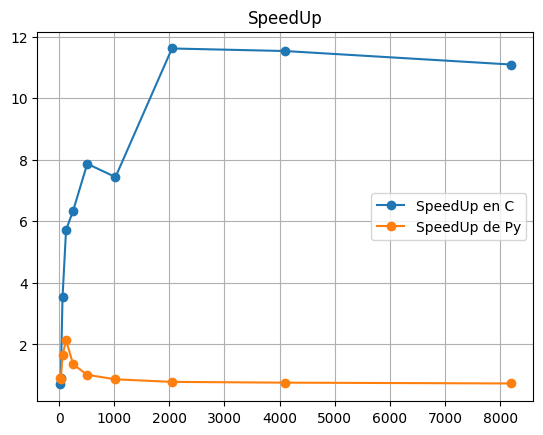

In [36]:
import matplotlib.pyplot as plt
#SU= tiempo sin mejora / tiempo con mejora
SU_c= []
SU_py = []
for i in range(len(time_c)):
    SU_c.append(time_ref[i]/time_c[i])

for i in range(len(time_py)):
    SU_py.append(time_ref[i]/time_py[i])

plt.plot(N, SU_c,"-o")
plt.plot(N, SU_py,"-o")
plt.grid()
plt.legend(["SpeedUp en C", "SpeedUp de Py"])
plt.title("SpeedUp")

